## **Probability Distributions**

Probability distributions describe how values of a **random variable** are distributed. They are fundamental in statistics and machine learning, influencing algorithms like Bayesian inference, hypothesis testing, and generative models.

## **1. Discrete Probability Distributions**

### **1.1. Bernoulli Distribution**
A **Bernoulli random variable** represents an experiment with two possible outcomes:  
$$
X =
\begin{cases} 
1, & \text{with probability } p \\
0, & \text{with probability } (1 - p)
\end{cases}
$$
where:  
- $ p $ is the probability of success (event happening, e.g., spam).  
- $ 1 - p $ is the probability of failure (event not happening, e.g., not spam).  

The **Bernoulli probability mass function (PMF)** is:  
$$
P(X = x) = p^x (1 - p)^{1-x}, \quad \text{for } x \in \{0,1\}
$$

- **Mean**: $ E[X] = p $
- **Variance**: $ \text{Var}(X) = p(1 - p) $

**ML Applications:**  
✅ Logistic Regression (models binary outcomes)  
✅ Neural Network activation (e.g., dropout follows a Bernoulli process)  

#### **Bernoulli Distribution in Binary Classification with logistic regression**
We use a linear prediction to output raw scores, then apply the **sigmoid function** to convert them into probabilities.
$$
Z = WX + b
$$

$$
P(Y=1 | X) = \sigma(Z) = \frac{1}{1 + e^{-Z}}
$$
where:
- $ X $ is the input features,
- $ W $ are model weights,
- $ b $ is the bias term.

This probability follows a **Bernoulli distribution**:  
$$
P(Y | X) = p^Y (1 - p)^{(1 - Y)}
$$
where $ p $ is the predicted probability.

**Maximum Likelihood Estimation (MLE)**

The **log-likelihood function** for Bernoulli-distributed outcomes is:  
$$
\log L(W, b) = \sum_{i=1}^{N} Y_i \log P(Y_i) + (1 - Y_i) \log(1 - P(Y_i))
$$
This is the function that logistic regression **maximizes** to find the best model parameters.

#### **Neural Networks and Bernoulli Output Layer**
In **binary classification neural networks**, the final layer often has:
- **One neuron with a sigmoid activation function**.
- The output is **interpreted as the probability of class 1**.
- This follows a **Bernoulli distribution**, and the loss function used is **binary cross-entropy**, which is derived from the Bernoulli likelihood.

$$
\text{Binary Cross-Entropy Loss} = - \frac{1}{N} \sum_{i=1}^{N} \left[ Y_i \log P(Y_i) + (1 - Y_i) \log(1 - P(Y_i)) \right]
$$



### **1.2. Binomial Distribution**
- Represents the number of successes in $ n $ independent **Bernoulli trials**.
- If $ X \sim \text{Binomial}(n, p) $:

  $$
  P(X = k) = \binom{n}{k} p^k (1 - p)^{(n - k)}
  $$

  where:
  - p is the probability of success in each trial,
  - $ k $ is the number of successes,
  - $ n $ is the total number of trials,
  - $ \binom{n}{k} $ is the binomial coefficient.

- **Mean**: $ E[X] = np $
- **Variance**: $ \text{Var}(X) = np(1 - p) $

Let me break down the derivation of the expected value and variance for a binomial distribution step by step.

A binomial distribution represents the number of successes in n independent trials, where each trial has probability p of success.

1. EXPECTED VALUE DERIVATION:

Let X be a binomial random variable. For each trial i:
- Let Xi be a Bernoulli random variable (0 or 1)
- P(Xi = 1) = p (success)
- P(Xi = 0) = 1-p (failure)

The binomial random variable X is the sum of n independent Bernoulli trials:
X = X₁ + X₂ + ... + Xₙ

Using linearity of expectation:
E[X] = E[X₁ + X₂ + ... + Xₙ]
     = E[X₁] + E[X₂] + ... + E[Xₙ]

For each Bernoulli trial:
E[Xi] = 1×p + 0×(1-p) = p

Therefore:
E[X] = np

2. VARIANCE DERIVATION:

For variance, we use the fact that for independent random variables:
Var(X + Y) = Var(X) + Var(Y)

First, let's find Var(Xi) for a single Bernoulli trial:

Var(Xi) = E[Xi²] - (E[Xi])²

E[Xi²] = 1²×p + 0²×(1-p) = p
(E[Xi])² = p²

Therefore:
Var(Xi) = p - p² = p(1-p)

Now, since X is the sum of n independent Bernoulli trials:

Var(X) = Var(X₁ + X₂ + ... + Xₙ)
       = Var(X₁) + Var(X₂) + ... + Var(Xₙ)
       = np(1-p)

The binomial distribution is particularly useful when we want to model the number of occurrences of a specific event in a fixed number of independent trials. Here are some practical applications:

**1. Modeling Email batches:** We can model the number of spam emails in a batch of n emails using a binomial distribution.

In [1]:
import numpy as np
from scipy.stats import binom

# Let's say historically 20% of emails are spam
n_emails = 100  # batch size
p_spam = 0.20   # probability of spam

# Create binomial distribution
dist = binom(n_emails, p_spam)

# Probability of seeing exactly 25 spam emails in a batch of 100
prob_exact = dist.pmf(25)
print(f"Probability of exactly 25 spam emails: {prob_exact:.4f}")

# Probability of seeing 25 or more spam emails (unusual spike)
prob_more = 1 - dist.cdf(24)
print(f"Probability of 25 or more spam emails: {prob_more:.4f}")

# Calculate expected number of spam emails and standard deviation
expected_spam = n_emails * p_spam
std_dev = np.sqrt(n_emails * p_spam * (1-p_spam))
print(f"Expected spam emails: {expected_spam}")
print(f"Standard deviation: {std_dev:.2f}")

# Calculate 95% confidence interval for the number of spam emails in a batch of 100 emails.
ci_lower, ci_upper = dist.interval(0.95)
print(f"95% CI: [{ci_lower:.1f}, {ci_upper:.1f}]")

Probability of exactly 25 spam emails: 0.0439
Probability of 25 or more spam emails: 0.1314
Expected spam emails: 20.0
Standard deviation: 4.00
95% CI: [12.0, 28.0]


In [2]:
# Set reasonable thresholds for detection
def find_spam_threshold(n_emails, p_normal, alpha=0.05):
    """
    Find threshold for number of occurrences that would be suspicious
    
    Parameters:
    n_emails: number of emails in batch
    p_normal: normal probability of occurrence in legitimate emails
    alpha: significance level
    """
    dist = binom(n_emails, p_normal)
    
    # Find smallest k where P(X ≥ k) < alpha
    k = 0
    while 1 - dist.cdf(k) > alpha:
        k += 1
    
    return k

# Example usage
batch_size = 100
normal_prob = 0.20
threshold = find_spam_threshold(batch_size, normal_prob)

print(f"Alert threshold: {threshold} occurrences")
print(f"This means seeing {threshold} or more in {batch_size} emails")
print(f"would happen less than 5% of the time by chance")

Alert threshold: 27 occurrences
This means seeing 27 or more in 100 emails
would happen less than 5% of the time by chance


**2. Click-Through Rate (CTR) Prediction in Online Advertising:**

In online advertising, CTR is the probability that a user clicks on an ad. Given multiple impressions, the number of clicks follows a binomial distribution.

Example: An ad is shown 1,000 times, and the expected click-through rate is 5%.
The number of clicks follows a Binomial(1000, 0.05) distribution.

### **1.3. Poisson Distribution**
The **Poisson distribution** models the probability of a **fixed number of events occurring in a fixed interval** (time, space, etc.) **when these events happen randomly and independently** at a known average rate $ \lambda $ (lambda).  

The **Poisson probability mass function (PMF)** is:  
$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0,1,2,\dots
$$
where:  
- $ k $ = Number of events occurring in the interval  
- $ \lambda $ = Expected number of events per interval (mean occurrence rate)  
- $ e $ = Euler’s number (≈2.718)  

**Key Properties of Poisson Distribution:**
1. **The mean and variance are both equal to $ \lambda $**.  
2. **Events occur independently**—the occurrence of one event does not affect another.  
3. **Applicable for rare events** over a fixed period or region.

**Practical Examples of Poisson Distribution (Predicting Customer Arrivals (ML Forecasting):**

🔹 **Use Case:** A shopping mall gets **15 customers per hour** on average.  
🔹 **Goal:** Predict **how many customers** they might receive in the next hour.  
🔹 **Poisson Modeling:**  
   - If the number of customers follows a Poisson distribution with $ \lambda = 15 $, we can model customer volume variability and allocate shopping center staffing accordingly.  

Recommended staffing levels: 2 to 5 staff members
95% confidence interval: 8.0 to 23.0 customers


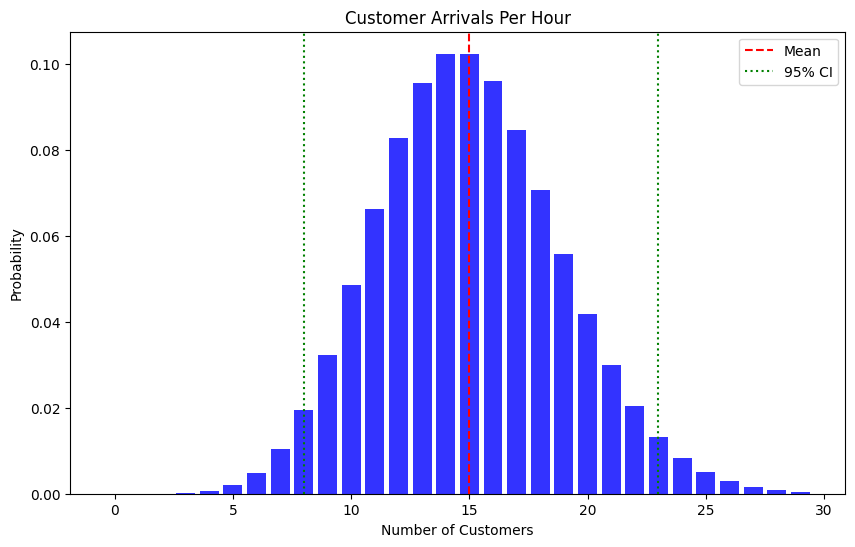

In [3]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

def analyze_customer_arrivals():
    """
    Analyze and predict customer arrivals using Poisson distribution
    """
    # Historical data: average 15 customers per hour
    lambda_rate = 15
    
    # Create Poisson distribution
    poisson_dist = poisson(lambda_rate)
    
    # Predict probabilities for different numbers of customers
    k_values = np.arange(0, 30)
    probabilities = poisson_dist.pmf(k_values)
    
    # Calculate confidence intervals for staffing
    ci_lower, ci_upper = poisson_dist.interval(0.95)
    
    # Plot distribution
    plt.figure(figsize=(10, 6))
    plt.bar(k_values, probabilities, alpha=0.8, color='blue')
    plt.axvline(lambda_rate, color='red', linestyle='--', label='Mean')
    plt.axvline(ci_lower, color='green', linestyle=':', label='95% CI')
    plt.axvline(ci_upper, color='green', linestyle=':')
    
    plt.title('Customer Arrivals Per Hour')
    plt.xlabel('Number of Customers')
    plt.ylabel('Probability')
    plt.legend()
    
    # Calculate staffing recommendations
    min_staff = np.ceil(ci_lower / 5)  # Assuming 1 staff per 5 customers
    max_staff = np.ceil(ci_upper / 5)
    
    print(f"Recommended staffing levels: {min_staff:.0f} to {max_staff:.0f} staff members")
    print(f"95% confidence interval: {ci_lower:.1f} to {ci_upper:.1f} customers")
    
    return poisson_dist

# Run analysis
customer_model = analyze_customer_arrivals()